In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/vk/7lyn6t1n5d19d0c0pxxfrpkr0000gn/T/pip-install-8af560ei/tensorflow-gpu_ee7e07ca6ff8434ba8365dd22805c829/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subp

In [2]:
!pip list


Package                           Version
--------------------------------- -----------
absl-py                           1.4.0
aiofiles                          22.1.0
aiosqlite                         0.19.0
alabaster                         0.7.12
anaconda-client                   1.11.2
anaconda-navigator                2.4.0
anaconda-project                  0.11.1
anyio                             3.5.0
appdirs                           1.4.4
applaunchservices                 0.3.0
appnope                           0.1.2
appscript                         1.1.2
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.1
asttokens                         2.0.5
astunparse                        1.6.3
atomicwrites                      1.4.0
attrs                             22.1.0
Automat                           20.2.0
autopep8                

In [3]:
import tensorflow as tf
import os
   
cpus = tf.config.experimental.list_physical_devices('CPU')
for cpu in cpus:
    # we can see here that we only have one CPU
    print(cpu)
    

2023-08-09 17:05:10.725659: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [4]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [5]:
# # understanding the data_dir format
# data_dir = 'data'

# # # return the directories in data_dir
# folders = os.listdir(data_dir) # happy and sad should be the two folders

# happy_pics = os.listdir(os.path.join(data_dir, 'happy'))
# sad_pics = os.listdir(os.path.join(data_dir, 'sad'))

# print("1. " + str(folders[0]))
# print("2. " + str(folders[1]))

# print(len(happy_pics))
# print(len(sad_pics))

# # Also could have used .format like below example
# print('1. {}'.format(folders[0]))
# print('2. {}'.format(folders[1]))

1. happy
2. sad
100
78


In [6]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']


In [7]:
### EXAMPLE LOADING AND DISPLAYING AN IMAGE WITH OpenCV(cv2 module), methods "imread" and "imshow"
# # Get the image filepath
# image_path = os.path.join(data_dir, 'happy', "0OA7a8ypX23MfpUP2p-_uJbco2TqEMJ0dQ1tCZ5AHC4CmxkOjvwUZ1oD30if.jpeg")

# # Load the image
# image = cv2.imread(image_path)

# # Display the image
# cv2.imshow("Image", image)
 
# # Wait for the user to press a key
# cv2.waitKey(2)
# cv2.waitKey(2)
# cv2.waitKey(2)
# cv2.waitKey(2)
 
# # Close all windows
# cv2.destroyAllWindows()
###


In [8]:
### EXAMPLE LOADING AND DISPLAYING AN IMAGE WITH OpenCV(cv2 module), matplotlib(pyplot module), methods "imread" and "imshow"
# # Get the image filepath
# image_path = os.path.join(data_dir, 'happy', "0OA7a8ypX23MfpUP2p-_uJbco2TqEMJ0dQ1tCZ5AHC4CmxkOjvwUZ1oD30if.jpeg")

# # Load the image
# image = cv2.imread(image_path)
    
# # get shape of image
# print(image.shape)

# # get matrix of image pixel values (RGB since we are using cv2)
# print(image)

# # Display the image
# # plotting image with color conversion since pyplot uses BRG and cv2 uses RGB
# plt.imshow(cvt.cvtColor(image, cv2.COLOR_BGR2RGB))

# # Close all windows
# cv2.destroyAllWindows()
####

In [9]:
# # may need to execute !rm -rf line below if .DS_Store file or is created in our data directory
# !rm -rf data/.DS_Store
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # imghdr.what() returns a string describing the image type if the test succeeded, or None if it failed.
            tip = imghdr.what(image_path)
            # We then test that image type against the "image_exts" list we declared
            # If the image is not one of these types we remove it
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [10]:
# tf.data.Dataset??
# # The tf.data API enables you to build complex input pipelines from simple, reusable pieces:
# # For example, the pipeline for an image model might aggregate data from files in a distributed file system, 
# # apply random perturbations to each image, and merge randomly selected images into a batch for training. 
# # The pipeline for a text model might involve extracting symbols from raw text data, 
# # converting them to embedding identifiers with a lookup table, and batching together sequences of different lengths

# tf.data.Dataset 
# # the Dataset api in tensorflow allows us to use a data pipeline instead of loading all our data into memory
# # this means that we can scale out to much larger data sets, as well as execute 
# # apply dataset transformations to preprocess data, as well as iterate over the dataset to process the elements for the main procedure
# # descriptive and efficient input pipelines allow us to process largedatasets with low overhead

# import tensorflow_datasets as tfds
# tfds.list_builders()
# # All dataset builders are subclass of tfds.core.DatasetBuilder
# # To get the list of available builders, use tfds.list_builders()

In [11]:
import numpy as np

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data') # this is building our data pipeline
# data = tf.keras.utils.image_dataset_from_directory??
# # Here we use a Keras Utility
# # We can load in data from a directory and do a wildcard search if we use tf.data.Dataset.list_files
# # this builds an image dataset for us on the fly, builds labels and classes, and preprocesses data out of the box
# # Some of the preprocessing is as follows:
# #      - groups into "batch_size"=32
# #      - resizes images to "image_size"=(256, 256)
# #      - Shuffles images "shuffle"=True
# # We can change these values and many more to our liking for preproccessing
# # EX: 
# # data = tf.keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(128,128))
# # This allows us to configure what our dataset will look like

data_iterator = data.as_numpy_iterator() # this is allowing us to access our data pipeline
# # Since we are grabbing data on the fly, and not loading it into memory first,
# # we cannot access it like a list. We must convert it into a numpy iterator
# # with the iterator we can loop through and continuously pull data batches back by chaining with .next()

batch = data_iterator.next() # this is actually accessing the data pipeline itself
# # Each time we run this we will get a new batch
# # the batch is a batch of the preproccessed data, along with their labels (0/1 for happy/sad)
# # batch[0] will give us a batch of 32 images represented as numpy arrays(matrices), in this case, (32 matrices)
# # batch[1] will give us a list of the labels, EX: [1,0,0,0,1,1,0,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1] (len=32)

# # So, all in all we are first building our data pipeline with "data = tf.keras.utils.image_dataset_from_directory('data')"
# # Then the following code is allowing us to actually access our data pipeline,
# # Allowing us to loop through it (): "data_iterator = data.as_numpy_iterator()"
# # Then we we are actually grabbing a batch of data with: batch = data_iterator.next()


Found 176 files belonging to 2 classes.


2023-08-09 17:05:26.931255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [176]
	 [[{{node Placeholder/_4}}]]
2023-08-09 17:05:26.932101: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [176]
	 [[{{node Placeholder/_4}}]]


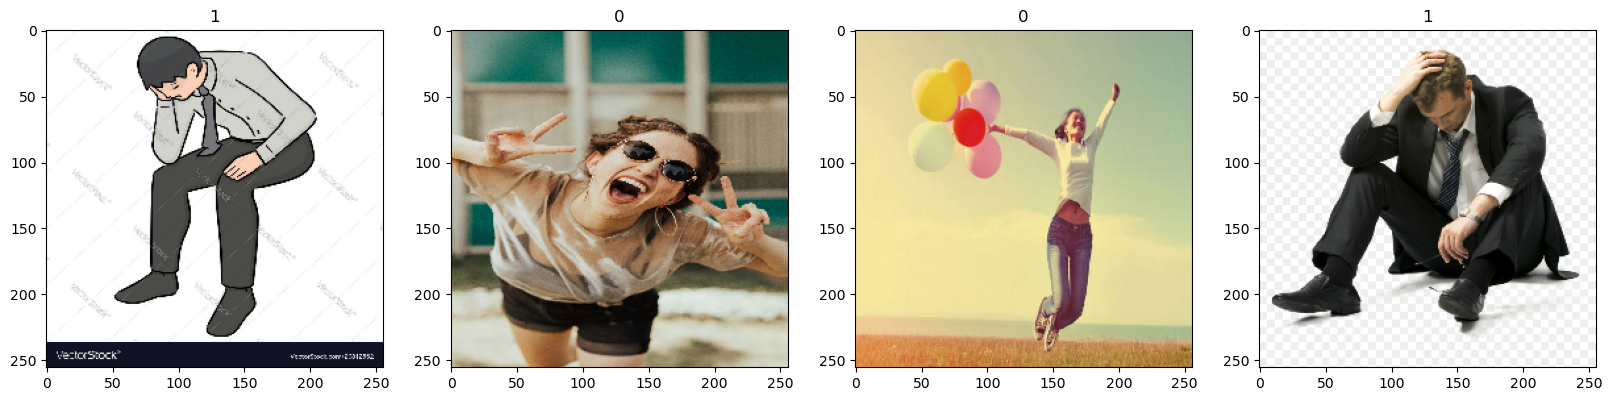

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# this will show us what labels are attributes to what images.
# it is clear that 0 is the label for a happy picture, and 1 is the label for a sad picture

In [14]:
# # Proprocess our data
# # We want to scale data. This helps our neural network preprocess data much faster.
# # RGB values range from 0-255, we want to scale them to range from 0-1
# # We can see that batch[0].min() == 0 and batch[1].max() == 255
# # So, we can divide by 255 that will scale appropriately
# EX: scaled = batch[0] / 255
# # What we want to do is scale our data in the data pipeline. This is much more efficient than scaling each batch as we pull it
data = data.map(lambda x,y: (x/255, y))
# # data.map allows us to apply a transformation as our data is being preproccessed through the data pipeline

# # There are many functions in tf.data.Dataset that we can use to preprocess our data as we iterate through it
# # .next() allows us to apply one or more of these processing transformation on our data while it is doing the same iteration
data.as_numpy_iterator().next()


2023-08-09 17:05:35.316839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [176]
	 [[{{node Placeholder/_4}}]]
2023-08-09 17:05:35.317321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [176]
	 [[{{node Placeholder/_4}}]]


(array([[[[1.9641544e-01, 2.1210171e-01, 3.2582721e-01],
          [2.0092414e-01, 2.1661042e-01, 3.3033592e-01],
          [2.0372936e-01, 2.1941563e-01, 3.3314112e-01],
          ...,
          [1.5294118e-01, 1.6078432e-01, 2.5098041e-01],
          [1.5294118e-01, 1.6078432e-01, 2.5098041e-01],
          [1.5294118e-01, 1.6078432e-01, 2.5098041e-01]],
 
         [[1.9641544e-01, 2.1210171e-01, 3.2582721e-01],
          [2.0000000e-01, 2.1568628e-01, 3.2941177e-01],
          [2.0168506e-01, 2.1737133e-01, 3.3109683e-01],
          ...,
          [1.5294118e-01, 1.6078432e-01, 2.5098041e-01],
          [1.5294118e-01, 1.6078432e-01, 2.5098041e-01],
          [1.5294118e-01, 1.6078432e-01, 2.5098041e-01]],
 
         [[1.9627063e-01, 2.1195690e-01, 3.2568240e-01],
          [1.9874938e-01, 2.1443565e-01, 3.2816115e-01],
          [2.0168506e-01, 2.1737133e-01, 3.3109683e-01],
          ...,
          [1.5294118e-01, 1.6078432e-01, 2.5098041e-01],
          [1.5294118e-01, 1.6078432e-

In [15]:
print(len(data))
train_size = int(len(data)*.7)
# # training data is what is going to be used to actually train our deep learning model (used during training)
val_size = int(len(data)*.2)
# # validation data is what is going to be used evaluate our model while it's learning (used during training)
test_size = int(len(data)*.1)+1
# # test data model will not see until final evaluation state (used post training)
print(train_size+val_size+test_size)

6
6


In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
# print(train)

In [17]:
from tensorflow.keras.models import Sequential
# There are 2 specific modoel building APIs avaialabe
# 1. Sequential: great for using when you have one data inpout and one data output
    # when data just kind of flows from top to bottom
# 2. Functional API, good if you have nultiple inputs, output, and layers
    # Great for using with deep learning model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# Conv2D: allows us to set uo a 2D concolutional nerual netwrok modle
# MaxPooling2D: Condenses data so it returns
# Dense: Fully connected layer available through Keras helps give use one output at end 
# Flatten: Formats the networkk from the convolutional network with has  layers or channels (kernal) and formats it into a reult our Dense property can take
# Dropout: Used for regularization

In [18]:
# Establish an instance of our convolutional neural netwrok class
model = Sequential()

In [19]:
# now we can chain on some of the properties we want
# When we are passing the first layer it needs to have an input/input layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# convolutions has 16 filters, each filter has 3 by 3 pixels, and we have a stride of 1 (meaning it will move over 1 pixel at a time)
# based on the specifications of our data_utils our input shape follows these specs 256 by 256 pixes by 3 channels
model.add(MaxPooling2D())
# this will effectively condense the information. It will give us the Maximum value after data passes through the ReLu activation function
# default is 2 by 2, so it's not going to retun just on value but about 50% in this case
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
### added this extra layer of convolution to make model more effective
### Loss and Validation metrics graphs got closer to what we are looking for

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
# Adding 3 convolution layers and MaxPooling layers

model.add(Flatten())
# flatten layer

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# 2 dense layers
# finally, the second dense layer will take all of our information and run it through the sigmoid function in map our final output to a number between 0 (happy )and 1 (sad)

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
# 'adam' is an optimizer there are many more, we are using "BinaryCrossentropy" because we are running a binary CNN, the metrics we are concerned with is the "accuracy" 

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [22]:
logdir='logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
# There are 2 really really important functions when training a neural network
    # 1. model.fit - is the training component
    # 2. model.predict - is when we actually go and make predictions
# train: our actual training data (defined a few sections above)
# epochs: each epoch is one run over our entire set of training data
# validation_data=val: again defined above, but this lets us perform evaluation on our validation and this lets us see how well our model is perfoming in real time
# callbacks: we are executing the callback function we defined to log data about how neural network is performing after each epoch (round of training)

Epoch 1/20


2023-08-09 17:05:41.467548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [176]
	 [[{{node Placeholder/_4}}]]
2023-08-09 17:05:41.471321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [176]
	 [[{{node Placeholder/_4}}]]


4/4 [==============================] - ETA: 0s - loss: 1.7071 - accuracy: 0.5234

2023-08-09 17:05:53.479820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [176]
	 [[{{node Placeholder/_4}}]]
2023-08-09 17:05:53.480383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [176]
	 [[{{node Placeholder/_4}}]]


4/4 [==============================] - 18s 3s/step - loss: 1.7071 - accuracy: 0.5234 - val_loss: 1.2615 - val_accuracy: 0.2812
Epoch 2/20
4/4 [==============================] - 15s 3s/step - loss: 0.8556 - accuracy: 0.4141 - val_loss: 0.6594 - val_accuracy: 0.6875
Epoch 3/20
4/4 [==============================] - 16s 3s/step - loss: 0.6650 - accuracy: 0.5703 - val_loss: 0.6462 - val_accuracy: 0.5625
Epoch 4/20
4/4 [==============================] - 17s 3s/step - loss: 0.6267 - accuracy: 0.6250 - val_loss: 0.5675 - val_accuracy: 0.6562
Epoch 5/20
4/4 [==============================] - 16s 3s/step - loss: 0.6180 - accuracy: 0.5859 - val_loss: 0.6302 - val_accuracy: 0.7500
Epoch 6/20
4/4 [==============================] - 16s 3s/step - loss: 0.5813 - accuracy: 0.7812 - val_loss: 0.6194 - val_accuracy: 0.5625
Epoch 7/20
4/4 [==============================] - 16s 3s/step - loss: 0.5930 - accuracy: 0.6641 - val_loss: 0.5517 - val_accuracy: 0.7188
Epoch 8/20
4/4 [=============================

In [25]:
# print(hist.history)

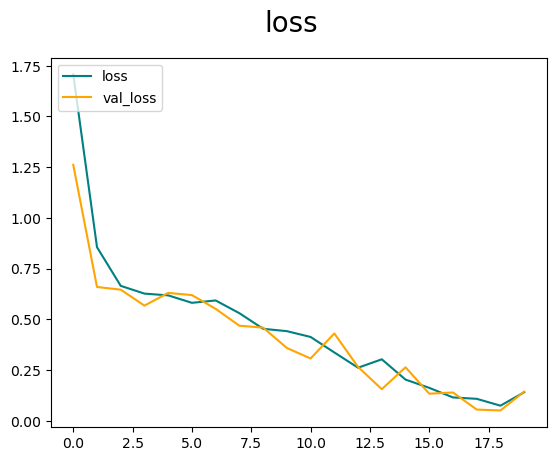

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

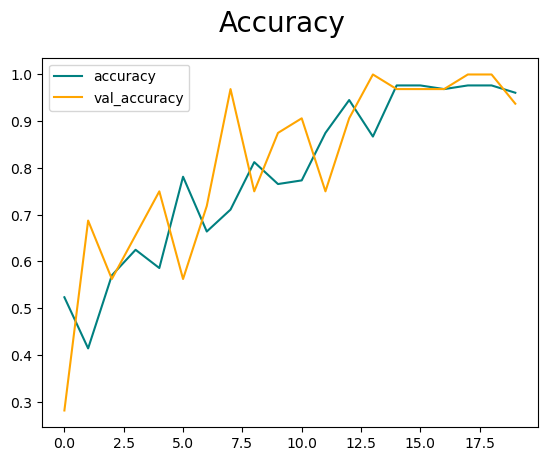

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
# we are impoting these ustilities, they are different metrics typically used for classification problems

In [29]:
# in order to use them we must instantiate them
# then we can use them to update our state as we go and make predictions
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
# then in order to test them out, we are going to loop through one batch in our testing data
for batch in test.as_numpy_iterator():
    x, y = batch # this is our set of images
    yhat = model.predict(x) # model.predict is how we make predictions, will return back a set of values between 0 and 1 (because we passed the final output through a sigmoid activation)
    pre.update_state(y, yhat) # We use model.predict in order to update our metrics
    re.update_state(y, yhat) 
    acc.update_state(y, yhat)

2023-08-09 17:11:39.873897: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [176]
	 [[{{node Placeholder/_4}}]]
2023-08-09 17:11:39.874725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [176]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 296ms/step


In [31]:
# print(pre.result(), re.result(), acc.result())
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:0.8571428656578064, Accuracy:0.9375


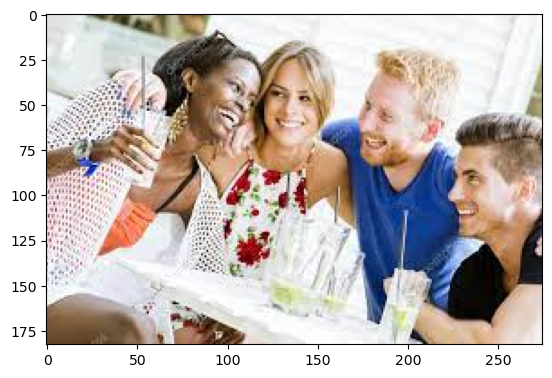

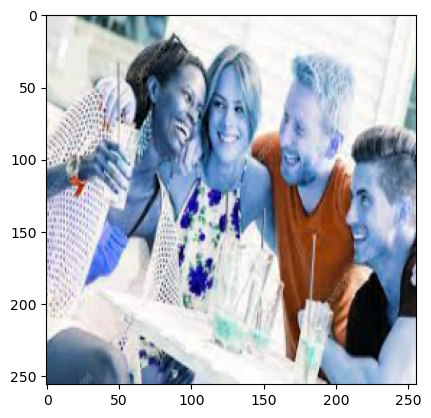

1/1 [==============================] - 0s 45ms/step
[[0.36387324]]
Predicted class in Happy


In [32]:
# testing neural network image classifier with Happy photo
if os.path.isfile('happytest3.jpg'):
    img = cv2.imread('happytest3.jpg') # relative path to image we want to test our model with
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    resize = tf.image.resize(img, (256,256))
    plt.imshow(resize.numpy().astype(int))
    plt.show()
    
    yhat = model.predict(np.expand_dims(resize/255, 0))
    
    print(yhat)

    if yhat > .5:
        print(f'Predicted to be in class: Sad')
    else:
        print(f'Predicted to be in class: Happy')

In [ ]:
# testing neural network image classifier with Sad photo
if os.path.isfile('sadtest3.jpg'):
    img = cv2.imread('sadtest3.jpg') # relative path to image we want to test our model with
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    resize = tf.image.resize(img, (256,256))
    plt.imshow(resize.numpy().astype(int))
    plt.show()
    
    yhat = model.predict(np.expand_dims(resize/255, 0))
    
    print(yhat)

    if yhat > .5:
        print(f'Predicted to be in class: Sad')
    else:
        print(f'Predicted to be in class: Happy')

In [40]:
from tensorflow.keras.models import load_model

In [41]:
model.save(os.path.join('models','happy/sad_CNN_model.h5'))
# .h5 at the end of our model in seriealizing the model similar to zip file, in a way it comresses 

In [42]:
new_model = load_model(os.path.join('models','happy/sad_CNN_model.h5'))

In [43]:
print(new_model)

In [44]:
yhat = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 96ms/step


In [45]:
if yhat > .5:
    print(f'Predicted to be in class: Sad')
else:
    print(f'Predicted to be in class: Happy')

Predicted class in Sad
